# Cat Pictures Classification

Implement a deep L-layer NN for supervised learning to classify cat vs. non-cat pictures by implementing Gradient Descent with regularization and dropout.

The data is stored as an h5 file. Utility functions implementing piecemeal functions for loading the dataset and running GD including parameter initialization, forward propagation, backward propagation, cost computation and prediction is stored on mltuils.py imported at the start.

### <font color='darkblue'>1. Import Packages<font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from getdata import load_dataset
from mlutils import * # utility functions

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

### <font color='darkblue'>2. Explore the Dataset and Reshape<font>

In [2]:
train_file = 'train_catvnoncat.h5'
test_file = 'test_catvnoncat.h5'
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset(train_file, test_file) # from getdata
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [3]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


### <font color='darkblue'>3. Train L_layer Gradient Descent model<font>

In [4]:
def neural_network(X, Y, layers_dims, optimizer="gd", num_epochs=3000, print_cost=False, learning_rate=0.0075, lambd=0, keep_prob=1):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                        
    
    # Parameters initialization. 
    parameters = initialize_parameters(layers_dims)

    
    for i in range(0, num_epochs):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.      
        AL, caches = forward_prop(X, parameters, keep_prob)
        
        # Compute cost.
        cost = compute_cost(AL, Y, parameters, lambd)
    
        # Backward propagation.
        grads = back_prop(AL, Y, caches, lambd, keep_prob)
 
        # Update parameters.
        parameters = update_gd(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    result = {"costs" : costs,
              "parameters" : parameters,
              "keep probability" : keep_prob, 
              "regularization parameter" : lambd,
              "learning_rate" : learning_rate,
              "num_epochs": num_epochs}
    
    return result

###  <font color='darkblue'>4. Use Model to Predict<font>

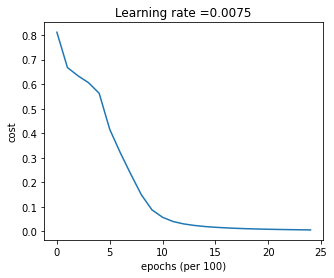

 Batch Gradient Descent took 2 min 35.01 sec
On the train set: 
Accuracy: 100.0000 %
On the test set:
Accuracy:  80.0000 %


In [5]:
layers_dims = [train_x.shape[0], 20, 7, 5, 1]
model = {}
with timer() as elapsed:
    model = neural_network(train_x, train_y, layers_dims, num_epochs = 2500, print_cost = False)
print(" Batch Gradient Descent took {:d} min {:.2f} sec".format(int(elapsed()//60), elapsed()%60))

# print accuracy
print ("On the train set: ")
pred_train = predict(train_x, train_y, model["parameters"] , model["keep probability"])
print ("On the test set:")
pred_test = predict(test_x, test_y, model["parameters"], model["keep probability"])

### <font color='darkblue'>5. Test Results and model hyperparameters<font>

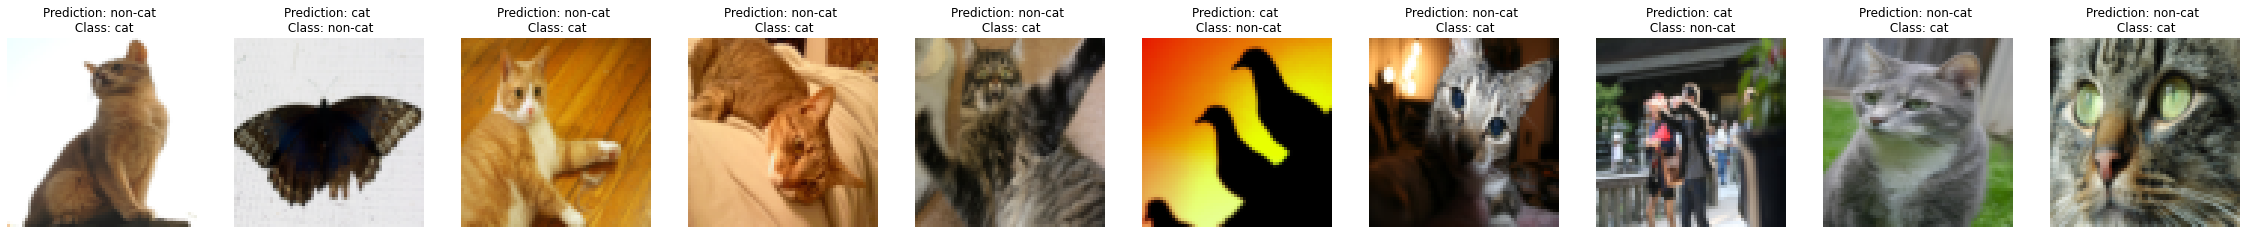

In [6]:
print_mislabeled_images(classes, test_x, test_y, pred_test)